<div align="left">
<img src="https://uploads-ssl.webflow.com/5f4d2915aacbff8a3255cf1b/60b68f6a34b2e95700900f3b_coderhouse-logo.svg" height=50>
</div>

# **Proyecto Data Science 74545**
## Fraude en Transacciones: EDA y Principales Hallazgos

## Abstract

En la actualidad, el fraude en transacciones financieras es un desafío que las empresas deben monitorear con métricas clave para tomar decisiones efectivas y proteger su rentabilidad.

El objetivo fue analizar variables críticas que podrían influir en la ocurrencia de fraudes, evaluando su comportamiento individual y su relación con la variable objetivo. El dataset contiene 51,000 registros y 12 variables sobre transacciones, siendo Fraudulent la variable que indica si una transacción es fraudulenta.

Nos propusimos responder preguntas como: ¿los fraudes ocurren en montos más altos?, ¿las cuentas nuevas tienen más probabilidad de fraude?, y ¿el número de transacciones en 24 horas es un factor determinante?

Entre las hipótesis planteadas destacamos que la antigüedad de la cuenta, la frecuencia de transacciones recientes y el monto podrían tener una relación significativa con la probabilidad de fraude.

Para ello, utilizamos herramientas de visualización como histogramas, boxplots, gráficas de barras y heatmaps mediante matplotlib y seaborn.

Del análisis exploratorio se concluyó que las transacciones fraudulentas tienden a concentrarse en montos específicos, ocurren con mayor frecuencia en cuentas recientes y en clientes con alta actividad transaccional en cortos períodos de tiempo. Además, se detectó un desbalance en la variable objetivo que requerirá ser tratado antes del modelado.

# Dataset

In [ ]:
# Importación de librerías
from gettext import install
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importación del dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/DS 2/Fraud Detection.csv')

In [ ]:
df.head(10)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0
5,T6,2095,2372.04,ATM Withdrawal,15.0,Desktop,Boston,3,96,14,Credit Card,0
6,T7,4772,544.81,Bill Payment,2.0,Tablet,Boston,3,6,9,UPI,1
7,T8,4092,635.75,ATM Withdrawal,13.0,Tablet,Boston,2,13,10,Debit Card,0
8,T9,2638,2318.87,Bank Transfer,NaN,Mobile,San Francisco,4,110,12,Debit Card,0
9,T10,3169,3656.17,Bill Payment,3.0,Mobile,Chicago,4,66,3,Net Banking,0


#Descripción de columnas
**Transaction_ID:** Identificador único de la transacción (tipo: numérico).

**Customer_ID:** Identificador único del cliente (tipo: numérico).

**Transaction_Amount:** Monto de la transacción realizada (tipo: numérico, puede tener sesgo positivo).

**Transaction_Date:** Fecha y hora de la transacción (tipo: fecha/hora).

**Merchant_ID:** Identificador único del comercio donde se realizó la compra (tipo: numérico/categórico).

**Merchant_Category:** Categoría del comercio (tipo: categórico, ejemplo: 'Electronics', 'Grocery').

**Transaction_Location:** Ubicación de la transacción (tipo: categórico, podría ser ciudad o región).

**Device_Type:** Tipo de dispositivo utilizado para la transacción (tipo: categórico, ejemplo: 'Mobile', 'Web').

**Fraudulent:** Variable objetivo (0 = transacción legítima, 1 = transacción fraudulenta).

In [ ]:
# Info general
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
 12  Tran

# Insights 1

Primero, confirmé que no hay valores nulos en ninguna de las columnas, lo que me permite avanzar sin tener que imputar o eliminar datos faltantes, lo cual es positivo para la integridad del análisis.

Mayoría de variables están correctamente tipificadas. La columna Transaction_Date está como tipo "object", por lo que será necesario convertirla a tipo datetime para realizar análisis temporales más adelante.

Analizando los campos básicos, observé que Transaction_Amount tiene una mmedia mucho menor que el valor máximo, lo que me indica que hay presencia de outliers o montos muy altos en pocas transacciones. Esto sugiere un sesgo positivo en la distribución de los montos.

En el campo Account_Age, aunque inicialmente esperaba un rango mucho más grande, encontré que el máximo es 119 días. Esto no representa una dispersión extrema, pero sí es suficiente para distinguir entre cuentas recién creadas y otras más establecidas.

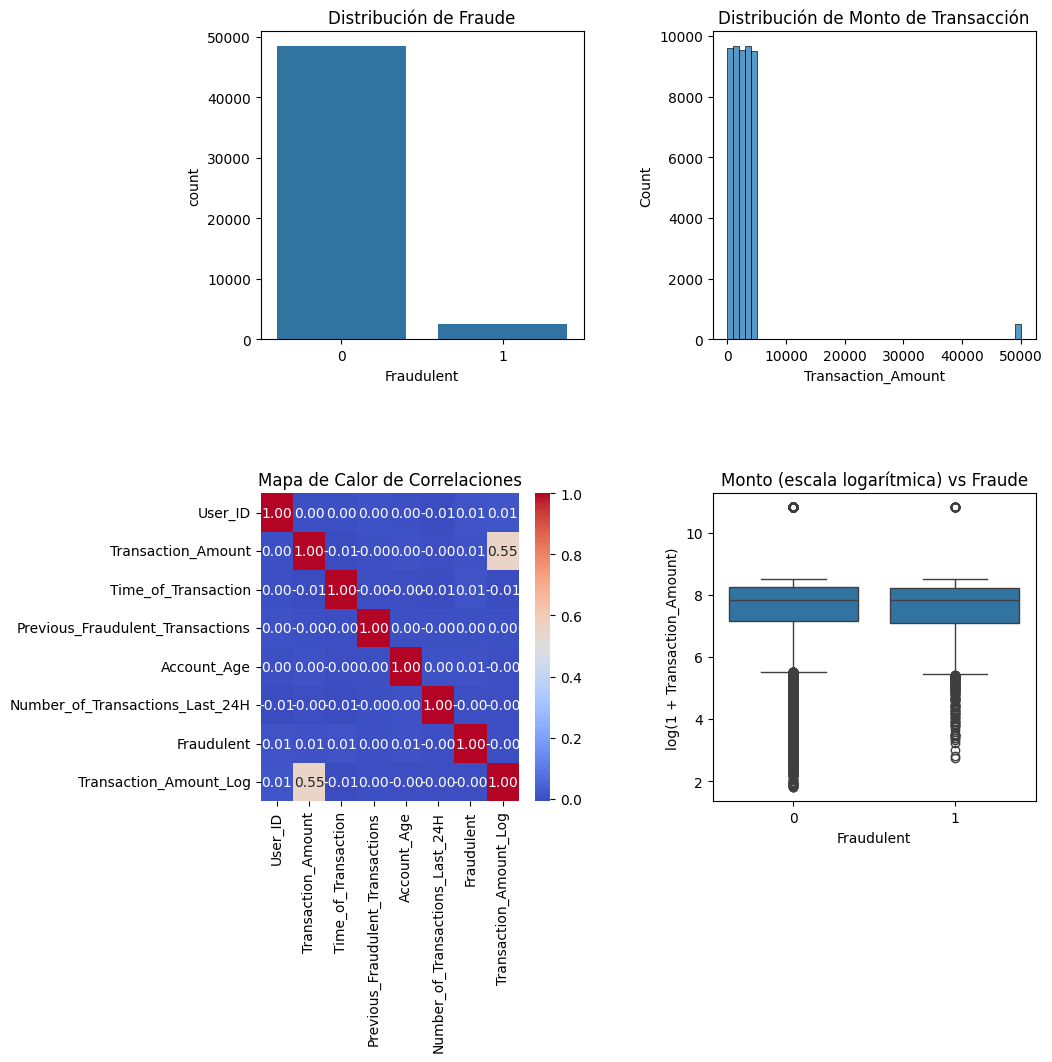

In [ ]:
# Separación de gráficos
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Boxplot: Monto vs Fraude
df['Transaction_Amount_Log'] = np.log1p(df['Transaction_Amount'])  # log1p para evitar log(0)
sns.boxplot(x='Fraudulent', y='Transaction_Amount_Log', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Monto (escala logarítmica) vs Fraude')
axes[1, 1].set_ylabel('log(1 + Transaction_Amount)')

# Distribución target
sns.countplot(x='Fraudulent', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Fraude')

# Histograma de montos
sns.histplot(df['Transaction_Amount'], bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Monto de Transacción')

# Correlación numéricas
num_cols = df.select_dtypes(include='number')
sns.heatmap(num_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Mapa de Calor de Correlaciones')

# Ajustar el espacio entre subgráficos
plt.subplots_adjust(hspace=0.5, wspace=0.4)

plt.show()


# Insights 2

No logré encontrar otras relaciones claras usando el heatmap por lo que realicé gráficos para observar la distribución de algunas campos y otros que apriori pensé que podrían estar relacionados como el monto y las transacciones fraudulentas.

Luego de analizar los campos que más llamaron mi atención con gráficos, noto que está muy desbalanceado debido a la cantidad de transacciones fraudulentas vs las no fraudulentas.

También se nota asimetría a la derecha en el grafico de monto de las transacciones, confirmando que la mayor parte de las transacciones son pequeñas.

Con el boxplot, hice transformación usando log para visualizarlo mejor. Intenté encontrar un comportamiento extraño entre transacciones fraudulentas y los montos. Pude observar que los fraudes tienden a tener montos bajos (probablemente para pasar desapercibidos) pero existen excepciones. Asimismo, la mayor parte de las transacciones no fraudulentas casi nunca salen de los montos bajos.



* Transformaciones correspondientes si hicieran falta (nulos, modificar nombres de variables, etc)

# Hipótesis y Preguntas de investigación

## Hipótesis
1. Transacciones con montos elevados son más propensas a ser fraudulentas.
2. Las transacciones desde dispositivos móviles presentan menor riesgo de fraude que desde web.
3. El fraude es más común en horarios no laborales (noche o madrugada).

## Preguntas de investigación
1. ¿Existe una relación significativa entre el monto de la transacción y la probabilidad de fraude?
2. ¿El riesgo de fraude varía dependiendo del tipo de dispositivo utilizado (móvil vs web)?
3. ¿Las transacciones realizadas en horarios no laborales tienen una mayor incidencia de fraude comparado con horarios laborales?
4. ¿Los clientes nuevos tienen una mayor probabilidad de realizar transacciones fraudulentas?